In [8]:
import tifffile as tf

In [7]:
import numpy as np

In [6]:
import rasterio as rio

In [10]:
import xarray as xr

In [7]:
datadir = 'C:/Users/jtrum/world_bank/data/'
wsf = tf.imread(datadir + 'WSF2019_v1_12_-10.tif')

In [9]:
# Open the GeoTIFF file
with rio.open('C:/Users/jtrum/world_bank/data/WSF2019_v1_12_-10.tif') as src:
    # You can now work with the raster data using 'src'
    # For example, you can access metadata like CRS, transform, and more:
    crs = src.crs
    transform = src.transform
    width = src.width
    height = src.height
    count = src.count  # Number of bands
    dtype = src.dtypes[0]  # Data type of the first band

    # Read a specific band from the raster (e.g., band 1)
    band1 = src.read(1)

    # Read the entire raster as a NumPy array (all bands)
    full_raster = src.read()

In [10]:
full_raster.shape

(1, 22487, 22487)

In [16]:
full_raster[0, 0, 0]

0

In [18]:
#see unique values in raster and how many of each
unique, counts = np.unique(full_raster, return_counts=True)

counts

array([499966267,   5698902], dtype=int64)

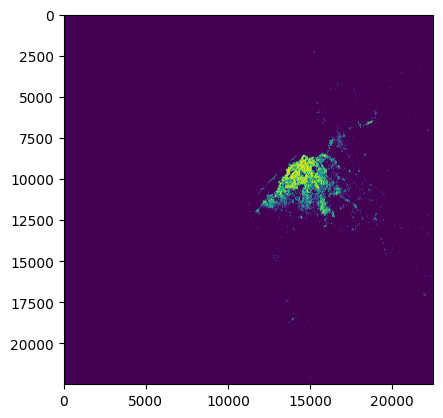

In [13]:
#make a plot of the raster
import matplotlib.pyplot as plt
plt.imshow(band1)
plt.show()

In [19]:
# remove 9000 pixels from the left side of the raster, 2000 pixels from the top, and 7000 pixels from the bottom
band1 = band1[2000:-7000, 9000:]

In [20]:
#see shape of raster
band1.shape

(13487, 13487)

In [21]:
13487*13487

181899169

In [22]:
#convert to pandas
import pandas as pd
df = pd.DataFrame(band1)


In [24]:
import georasters as gr

ImportError: Traceback (most recent call last):
  File "c:\Users\jtrum\miniconda3\envs\wash_scan\lib\site-packages\osgeo\__init__.py", line 30, in swig_import_helper
    return importlib.import_module(mname)
  File "c:\Users\jtrum\miniconda3\envs\wash_scan\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 657, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 556, in module_from_spec
  File "<frozen importlib._bootstrap_external>", line 1166, in create_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
ImportError: DLL load failed while importing _gdal: The specified module could not be found.

On Windows, with Python >= 3.8, DLLs are no longer imported from the PATH.
If gdalXXX.dll is in the PATH, then set the USE_PATH_FOR_GDAL_PYTHON=YES environment variable
to feed the PATH into os.add_dll_directory().

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,13477,13478,13479,13480,13481,13482,13483,13484,13485,13486
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Open the TIFF image
with rio.open('C:/Users/jtrum/world_bank/data/WSF2019_v1_12_-10.tif') as src:
    luanda_bbox = aoi.total_bounds # Get the bounding box of Luanda
    window = src.window(*luanda_bbox) # Calculate the window for cropping
    cropped_data = src.read(1, window=window)  # Read the data from the window

# Ensure that only 0 and 255 values are retained
cropped_data[cropped_data != 0] = 255

NameError: name 'aoi' is not defined

In [2]:
import tifffile as tf
import numpy as np
import geopandas as gpd
import pandas as pd
import rasterio as rio
from rasterio.mask import mask
from rasterio.plot import show
from shapely.geometry import mapping
from rasterio.windows import Window

datadir = 'C:/Users/jtrum/world_bank/data/'
wsf = tf.imread(datadir + 'WSF2019_v1_12_-10.tif')
aoi = gpd.read_file(datadir + 'luanda2clean.shp')

c:\Users\jtrum\miniconda3\envs\wash_scan\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\jtrum\AppData\Local\Temp\ipykernel_8512\2310863835.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. Ho

AttributeError: module 'pyproj' has no attribute '__version__'

NameError: name 'aoi' is not defined

In [3]:
cropped_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
# Replace 'input.tif' with your input TIFF file and 'output.tif' with the desired output file name.
input_tiff_path = datadir + 'wsf2019.tif'
output_tiff_path = datadir + 'output.tif'

# Load the input TIFF file
with rio.open(input_tiff_path) as src:
    # Define CRS (Coordinate Reference System) for the output file
    crs = src.crs

    # Define geotransform parameters (affine transformation)
    # You may need to adjust these based on your specific data
    # (left, top), (x_resolution, y_resolution)
    transform = from_origin(src.bounds.left, src.bounds.top, src.res[0], src.res[1])

    # Create a new GeoTIFF file with CRS and transform
    with rio.open(output_tiff_path, 'w', driver='GTiff', width=src.width, height=src.height,
                       count=src.count, dtype=src.dtypes[0], crs=crs, transform=transform) as dst:
        # Copy the data from the input TIFF to the output TIFF
        dst.write(src.read())

print(f"GeoTIFF file with CRS and transform created: {output_tiff_path}")


GeoTIFF file with CRS and transform created: C:/Users/jtrum/world_bank/data/output.tif


In [4]:
# Count the occurrences of each unique value
unique_values, value_counts = np.unique(ws, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 50776044
Value: 255, Count: 5495036


In [5]:
wsf2019 = tf.imread(datadir + 'wsf2019.tif')
wsf2019.shape

(850, 771)

In [10]:
import matplotlib.pyplot as plt

In [21]:
wsf2019

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<Axes: >

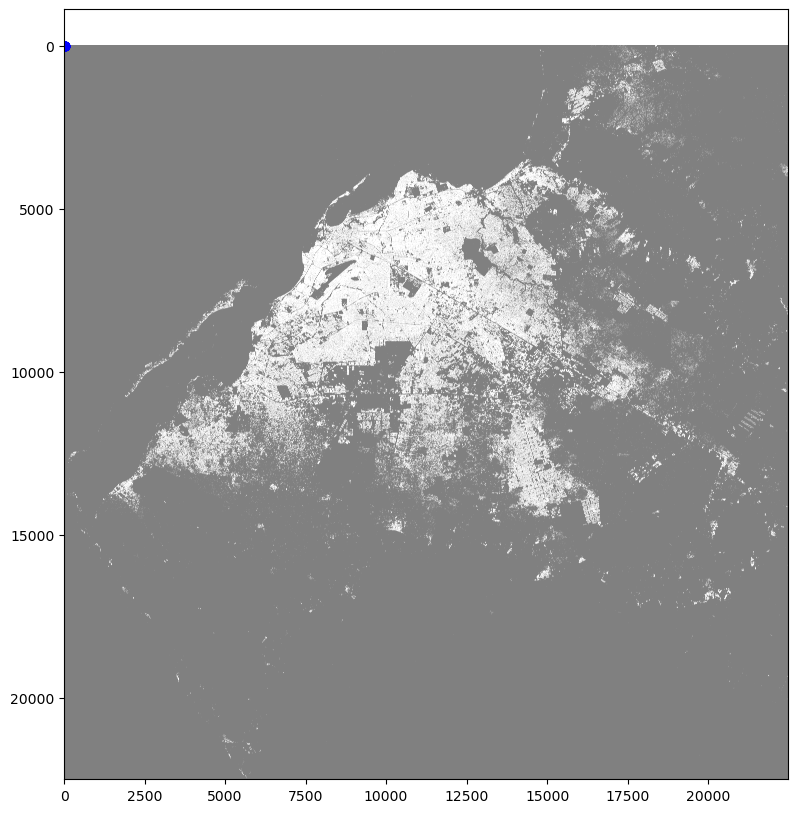

In [20]:
# make a plot of the aoi with the tiff data overlaid
fig, ax = plt.subplots(figsize=(10, 10))
aoi.plot(ax=ax, color='red')
show(wsf2019, ax=ax, cmap='gray', alpha=0.5)
water_infrastructure.plot(ax=ax, color='blue', alpha=0.5)


In [8]:
# export the cropped data as a GeoTIFF
with rio.open('C:/Users/jtrum/world_bank/data/wsf2019.tif', 'w', **src.profile) as dest:
    dest.write(cropped_data, 1)

In [13]:
import osmnx as ox

In [15]:
tags_list = [
    {'landuse': ['reservoir', 'basin']},
    {'amenity': ['drinking_water', 'watering_place', 'water_point']},
    {'man_made': ['water_well', 'water_tower', 'water_works', 'reservoir_covered', 'storage_tank', 'monitoring_station', 'wastewater_plant', 'watermill', 'pipeline']}
]        

water_infrastructure = pd.DataFrame(columns=['feature', 'geometry'])

for tags in tags_list:
    data = ox.geometries_from_polygon(aoi.geometry[0], tags=tags)
    data = data[['geometry']]
    data['feature'] = list(tags.keys())[0]  # Extract the feature type from the tags
    water_infrastructure = water_infrastructure.append(data)

water_infrastructure = water_infrastructure.reset_index(drop=True)
water_infrastructure = gpd.GeoDataFrame(water_infrastructure, geometry='geometry', crs=aoi.crs)

C:\Users\jtrum\AppData\Local\Temp\ipykernel_25404\1104742602.py:10: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  data = ox.geometries_from_polygon(aoi.geometry[0], tags=tags)
C:\Users\jtrum\AppData\Local\Temp\ipykernel_25404\1104742602.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  water_infrastructure = water_infrastructure.append(data)
c:\Users\jtrum\miniconda3\envs\wash_scan\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\jtrum\AppData\Local\Temp\ipykernel_25404\1104742602.py:10: UserWarning: The `geometries` module and `geome

In [16]:
water_infrastructure

,feature,geometry
0,landuse,"POLYGON ((13.37171 -8.96650, 13.37154 -8.96654..."
1,landuse,"POLYGON ((13.42644 -8.96246, 13.42685 -8.96349..."
2,landuse,"POLYGON ((13.32465 -8.87447, 13.32464 -8.87460..."
3,landuse,"POLYGON ((13.40856 -9.12585, 13.40885 -9.12606..."
4,landuse,"POLYGON ((13.41248 -9.12853, 13.41237 -9.12871..."
...,...,...
67,man_made,POINT (13.41021 -9.02977)
68,man_made,POINT (13.40010 -9.06025)
69,man_made,"POLYGON ((13.41069 -9.04171, 13.41066 -9.04166..."
70,man_made,"POLYGON ((13.41041 -9.15145, 13.40960 -9.15160..."


In [19]:
import rasterio
from rasterio.transform import from_origin
from rasterio.crs import CRS


GeoTIFF file with CRS and transform created: C:/Users/jtrum/world_bank/data/output.tif


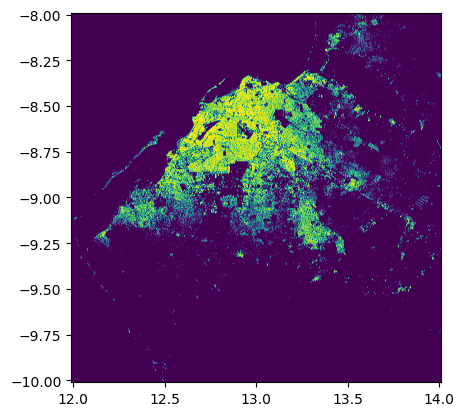

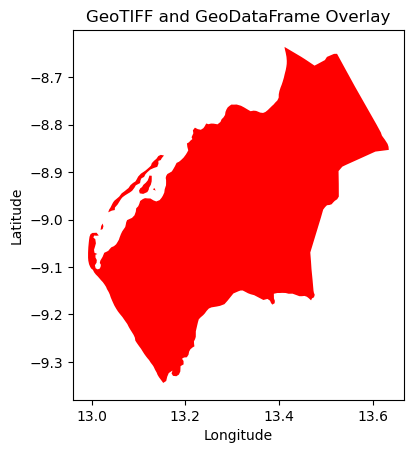

In [25]:
# Load the TIFF file
with rasterio.open(datadir + 'output.tif') as src:
    # Display the TIFF file using rasterio's show function
    show(src)

# Overlay the GeoDataFrame on the plot
aoi.plot(ax=plt.gca(), color='red', markersize=5)

# Add titles and labels if needed
plt.title("GeoTIFF and GeoDataFrame Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

<Axes: >

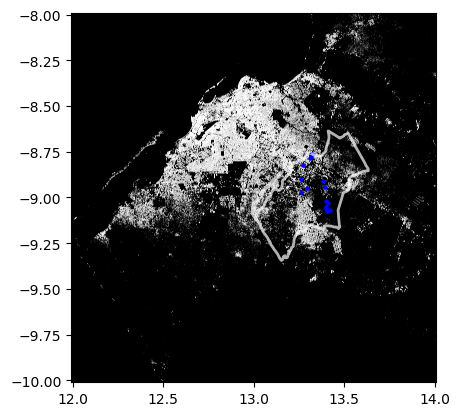

In [28]:
# Load the GeoTIFF file
with rasterio.open(datadir + 'output.tif') as src:
    # Plot the GeoTIFF in grayscale
    show(src, cmap='gray', ax=plt.gca())

    # Overlay the AOI outline in white with transparent background
    aoi = aoi.to_crs(src.crs)
    aoi.boundary.plot(ax=plt.gca(), color='white', linewidth=2, alpha=0.7)

# Plot the 'water_infrastructure' GeoDataFrame in blue
water_infrastructure.plot(ax=plt.gca(), color='blue', markersize=5)

In [26]:
show(src)

RasterioIOError: Dataset is closed: C:/Users/jtrum/world_bank/data/output.tif

In [34]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.features import geometry_mask
import numpy as np

# Load the GeoJSON as a GeoDataFrame
aoi = gpd.read_file(datadir + 'luanda2clean.geojson')

# Open the GeoTIFF file using rasterio
with rasterio.open(datadir + 'WSF2019_v1_12_-10.tif') as src:
    # Crop the GeoTIFF to the GeoJSON extent
    out_image, out_transform = mask(src, aoi.geometry, crop=True)
    out_meta = src.meta.copy()

# Create a binary mask for the GeoTIFF values (0 or 255)
binary_mask = (out_image == 0) | (out_image == 255)

# Update the metadata to reflect the new cropped extent
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform,
                 "nodata": np.nan})

# Save the cropped GeoTIFF with preserved binarized values
with rasterio.open('cropped_wsf.tif', 'w', **out_meta) as dst:
    dst.write(out_image)

# Now you have 'cropped_wsf.tif' with the cropped extent and NaN values for masked areas.
# You can use this GeoTIFF for further processing and overlay it with other data.


ValueError: Given nodata value, nan, is beyond the valid range of its data type, uint8.

**BELOW**

In [2]:
import os
os.environ['USE_PATH_FOR_GDAL_PYTHON'] = 'YES'
import pandas as pd
import numpy as np
import georasters as gr


c:\Users\jtrum\miniconda3\envs\wash\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
import brotli
print(brotli.__file__)

None


In [6]:
import shapely
print(shapely.__file__)

c:\Users\jtrum\miniconda3\envs\wash_scan\lib\site-packages\shapely\__init__.py


In [1]:
import pyproj

In [2]:
pyproj.__version__

AttributeError: module 'pyproj' has no attribute '__version__'

In [3]:
dir(pyproj)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [4]:
print(pyproj.__path__)

_NamespacePath(['c:\\Users\\jtrum\\miniconda3\\envs\\wash_scan\\lib\\site-packages\\pyproj'])


In [7]:
pyproj

<module 'pyproj' (namespace)>

In [15]:
wsf = gdal.Open(datadir + 'WSF2019_v1_12_-10.tif')

In [ ]:
# crop first 7500 from the left side off the image
# crop first 5000 from the top of the image
wsf_crop = wsf.ReadAsArray(7500, 5000, wsf.RasterXSize - 7500, wsf.RasterYSize - 5000)


In [2]:
datadir = 'C:/Users/jtrum/world_bank/data/'
wsf = gr.from_file(datadir + 'WSF2019_v1_12_-10.tif')

'''
this step may not be necessary, but because of how large the shape is, it may be useful to reduce the size of the shapefile to only the area of interest
'''
x_min = wsf.bounds.left
x_max = wsf.bounds.left + 7500
y_min = wsf.bounds.bottom
y_max = wsf.bounds.top

wsf_crop = wsf.crop(x_min, y_min, x_max, y_max)

NameError: name 'gr' is not defined

<Axes: >

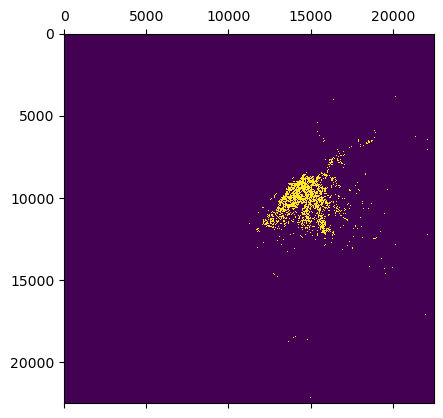

In [6]:
wsf.plot()

In [8]:
wsf.shape

(22487, 22487)

In [7]:
wsf = wsf.to_pandas()
wsf.head()

MemoryError: Unable to allocate 3.77 GiB for an array with shape (505665169,) and data type int64

In [12]:
import rioxarray as rxr
import xarray as xr
import pandas as pd

In [13]:
datadir = 'C:/Users/jtrum/world_bank/data/'

In [24]:
array = rxr.open_rasterio(datadir + 'WSF2019_v1_12_-10.tif')
array = xr.open_rasterio(datadir + 'WSF2019_v1_12_-10.tif')

df = array[0].to_pandas()
df

C:\Users\jtrum\AppData\Local\Temp\ipykernel_24052\2192282450.py:2: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  array = xr.open_rasterio(datadir + 'WSF2019_v1_12_-10.tif')


x,11.990039,11.990129,11.990218,11.990308,11.990398,11.990488,11.990578,11.990667,11.990757,11.990847,...,14.009182,14.009272,14.009362,14.009451,14.009541,14.009631,14.009721,14.009811,14.009901,14.009990
y,,,,,,,,,,,,,,,,,,,,,
-7.990020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.990110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.990200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.990290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.990380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-10.009613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-10.009703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-10.009792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Get the x and y coordinates as separate DataFrames
x_coords = pd.DataFrame({'x': df.columns})
y_coords = pd.DataFrame({'y': df.index})

# Melt the original DataFrame into a long format
melted_df = pd.melt(df.reset_index(), id_vars=['y'], var_name='x', value_name='value')

# Merge the x and y coordinates back into the melted DataFrame
final_df = melted_df.merge(x_coords, on='x').merge(y_coords, on='y')
final_df


,y,x,value
0,-7.990020,11.990039,0
1,-7.990020,11.990129,0
2,-7.990020,11.990218,0
3,-7.990020,11.990308,0
4,-7.990020,11.990398,0
...,...,...,...
505665164,-10.009972,14.009631,0
505665165,-10.009972,14.009721,0
505665166,-10.009972,14.009811,0
505665167,-10.009972,14.009901,0


In [30]:
final_df.to_csv(datadir + 'wsf2019.csv')

KeyboardInterrupt: 

In [29]:
#convert 'final_df' to a geodataframe
import geopandas as gpd
from shapely.geometry import Point

# Create a geometry column from the x and y coordinates
final_df['geometry'] = final_df.apply(lambda row: Point(row['x'], row['y']), axis=1)
final_df

MemoryError: 

In [16]:
array.shape

(1, 22487, 22487)

In [18]:
df = array[0].to_pandas()
df

x,11.990039,11.990129,11.990218,11.990308,11.990398,11.990488,11.990578,11.990667,11.990757,11.990847,...,14.009182,14.009272,14.009362,14.009451,14.009541,14.009631,14.009721,14.009811,14.009901,14.009990
y,,,,,,,,,,,,,,,,,,,,,
-7.990020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.990110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.990200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.990290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.990380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-10.009613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-10.009703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-10.009792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from shapely.geometry import Point
import geopandas as gpd

c:\Users\jtrum\miniconda3\envs\wash_scan\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\jtrum\AppData\Local\Temp\ipykernel_24052\1691430808.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.rea

In [23]:
# turn 'df' into a geodataframe
df = df.reset_index()
df = df.rename(columns={'index': 'x', 'level_0': 'y', 0: 'value'})
df['geometry'] = df.apply(lambda row: Point(row['x'], row['y']), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [8]:
# import georasters as gr
import os
os.environ['USE_PATH_FOR_GDAL_PYTHON'] = 'YES'
import georaster as gr
import matplotlib.pyplot as plt

In [3]:
datadir = 'C:/Users/jtrum/world_bank/data/'

In [4]:
image = gr.SingleBandRaster(datadir + 'WSF2019_v1_12_-10.tif')

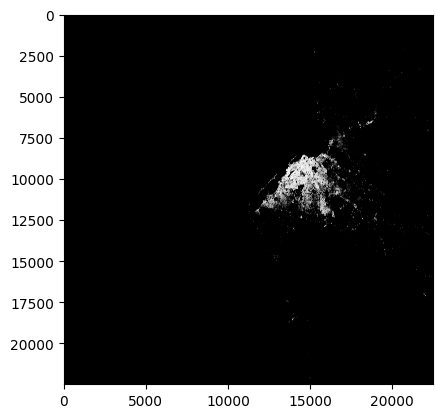

In [9]:
plt.imshow(image.r, cmap='gray')

In [12]:
#crop 'image' to the area of interest

#load the shapefile
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio as rio

datadir = 'C:/Users/jtrum/world_bank/data/'
aoi = gpd.read_file(datadir + 'aoiLuanda.geojson')

#crop the raster to the area of interest
with rio.open(datadir + 'WSF2019_v1_12_-10.tif') as src:
    # You can now work with the raster data using 'src'
    # For example, you can access metadata like CRS, transform, and more:
    crs = src.crs
    transform = src.transform
    width = src.width
    height = src.height
    count = src.count  # Number of bands
    dtype = src.dtypes[0]  # Data type of the first band

    # Read a specific band from the raster (e.g., band 1)
    band1 = src.read(1)

    # Read the entire raster as a NumPy array (all bands)
    full_raster = src.read()

full_raster.shape


(1, 22487, 22487)

In [14]:
full_raster

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
#now crop 'full_raster' to the area of interest



In [7]:
image.shape

AttributeError: 'SingleBandRaster' object has no attribute 'shape'

In [5]:
image.proj()

TypeError: 'NoneType' object is not callable

In [19]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask

# Load your GeoRaster using Rasterio
with rasterio.open(datadir + 'WSF2019_v1_12_-10.tif') as src:
    # Load your AOI GeoDataFrame (replace "aoi.shp" with the path to your AOI file)
    aoi_gdf = gpd.read_file(datadir + "aoiLuanda.geojson")
    
    # Use the total_bounds property of the AOI GeoDataFrame to get its bounding box
    aoi_bounds = aoi_gdf.total_bounds

    # Create a mask for the AOI within the GeoRaster's extent
    mask = geometry_mask(aoi_gdf.geometry, out_shape=src.shape, transform=src.transform, invert=True)

    # Read the GeoRaster data within the AOI
    cropped_data = src.read(masked=True)

    # Update the metadata for the cropped raster
    src.meta.update({
        'transform': src.window_transform(aoi_bounds)
    })

# Save the cropped GeoRaster to a new file
with rasterio.open("cropped_georaster.tif", 'w', **src.meta) as dst:
    dst.write(cropped_data)

# You now have the cropped GeoRaster in "cropped_georaster.tif"


ValueError: too many values to unpack (expected 2)

In [24]:
import os
os.environ['USE_PATH_FOR_GDAL_PYTHON'] = 'YES'

#folder location
os.chdir(r'C:/Users/jtrum/world_bank/data/')

#read raster file
from osgeo import gdal, ogr, osr

In [26]:
raster = gdal.Open('WSF2019_v1_12_-10.tif')
raster

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000025470A8B870> >

In [38]:
raster.RasterYSize

22487

In [41]:
band = raster.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000002545A529060> >

In [42]:
band.ReadAsArray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
# converting raster to shapefile
proj = raster.GetProjection()
shp_proj = osr.SpatialReference()
shp_proj.ImportFromWkt(proj)

out = 'output/WSF_Luanda.shp'
call_drive = ogr.GetDriverByName('ESRI Shapefile')
create_shp = call_drive.CreateDataSource(out)
shp = create_shp.CreateLayer('layername', srs=shp_proj)
new_field = ogr.FieldDefn(str('ID'), ogr.OFTInteger)
shp.CreateField(new_field)

gdal.Polygonize(band, None, shp, 0, [], callback=None)
create_shp.Destroy()
raster = None

AttributeError: 'NoneType' object has no attribute 'CreateLayer'

## THIS WORKS

In [45]:
import os
from osgeo import gdal, ogr, osr

# Path to the input raster
raster_path = 'WSF2019_v1_12_-10.tif'

# Specify the output shapefile path
out = 'output/WSF_Luanda.shp'

# Check if the output directory exists, and create it if necessary
output_dir = os.path.dirname(out)
if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)

# Open the raster dataset
raster = gdal.Open(raster_path)

if raster is None:
    print("Failed to open the raster dataset.")
else:
    proj = raster.GetProjection()
    shp_proj = osr.SpatialReference()
    shp_proj.ImportFromWkt(proj)

    call_drive = ogr.GetDriverByName('ESRI Shapefile')
    create_shp = call_drive.CreateDataSource(out)

    if create_shp is None:
        print("Failed to create the shapefile.")
    else:
        shp = create_shp.CreateLayer('layername', srs=shp_proj)
        new_field = ogr.FieldDefn('ID', ogr.OFTInteger)
        shp.CreateField(new_field)

        # Assuming 'band' is correctly defined
        gdal.Polygonize(band, None, shp, 0, [], callback=None)

        # Clean up
        create_shp.Destroy()
        raster = None

        print("Shapefile created successfully.")


Shapefile created successfully.


In [1]:
import geopandas as gpd
import os

c:\Users\jtrum\miniconda3\envs\wash\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\jtrum\AppData\Local\Temp\ipykernel_20824\3379007050.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. Howeve

In [2]:
os.chdir(r'C:/Users/jtrum/world_bank/data/')
wsf = gpd.read_file('output/WSF_Luanda.shp')
aoi = gpd.read_file('aoiLuanda.geojson')

In [3]:
#set wsf crs to match aoi crs
wsf = wsf.to_crs(aoi.crs)
print(wsf.crs)
print(aoi.crs)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [4]:
join = gpd.sjoin(wsf, aoi, how='inner', predicate='intersects')

In [5]:
join = join[join.geometry.intersects(aoi.unary_union)]

In [6]:
len(join)

383504

In [33]:
join['index_right'].value_counts()

index_right
0    383504
Name: count, dtype: int64

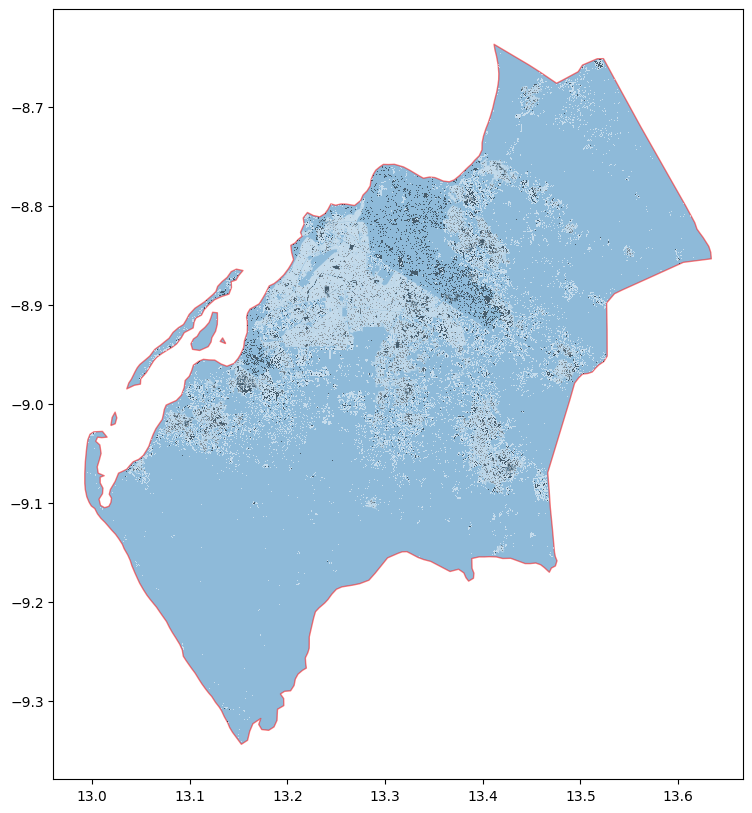

In [16]:
#make a plot of within, with aoi underneath and colored by column 'ID'
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
#aoi underlain, transparent background but outlined in red
aoi.plot(ax=ax, edgecolor='red', alpha=0.5)
within.plot(ax=ax, column='ID', cmap='gray', alpha=0.5)
#add colorbar
sm = plt.cm.ScalarMappable(cmap='gray', norm=plt.Normalize(vmin=within['ID'].min(), vmax=within['ID'].max()))
plt.show()

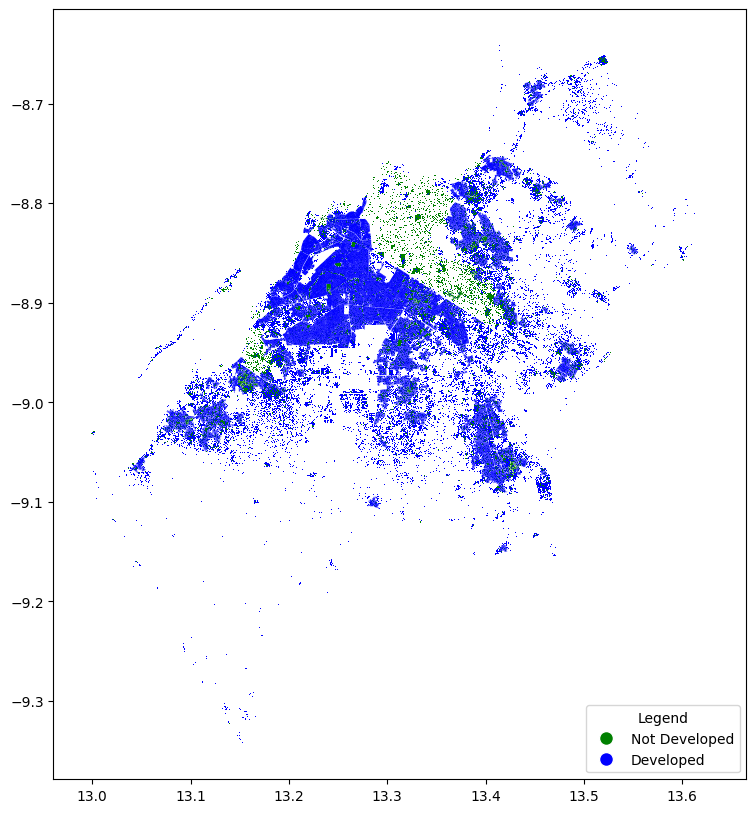

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap with green for 0 and blue for 255
cmap = ListedColormap(['green', 'blue'])

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the AOI with a red outline and transparent background
#aoi.plot(ax=ax, edgecolor='red', alpha=0.5)

# Plot the 'within' GeoDataFrame using the custom colormap and column 'ID'
within.plot(ax=ax, column='ID', cmap=cmap, alpha=1)

# Create a custom legend
legend_labels = {0: 'Not Developed', 255: 'Developed'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[label], markersize=10, markerfacecolor=color)
           for label, color in zip(legend_labels.keys(), ['green', 'blue'])]
ax.legend(handles=handles, title='Legend', loc='lower right')

plt.show()


In [ ]:
within

In [ ]:
result = gpd.GeoDataFrame([merge], columns=['geometry'])

In [ ]:
result.reset_index(drop=True, inplace=True)

In [49]:
luanda = gpd.read_file('aoiLuanda.geojson')

In [33]:
#read shapefile
import geopandas as gpd
import pandas as pd

#read shapefile
wsf_shp = gpd.read_file('output/WSF_Luanda.shp')

In [34]:
wsf_shp

,geometry
